In [ ]:
import zipfile
import os
from google.colab import drive
drive.mount('/content/drive')

# Define paths
test_data_zip = "/content/drive/MyDrive/Project-2/test.zip"
train_data_zip = "/content/drive/MyDrive/Project-2/train.zip"
train_dir = "/content/train"
test_dir = "/content/test"

# Unzip train dataset
with zipfile.ZipFile(train_data_zip, 'r') as zip_ref:
    zip_ref.extractall(train_dir)

# Unzip test dataset
with zipfile.ZipFile(test_data_zip, 'r') as zip_ref:
    zip_ref.extractall(test_dir)

print("Unzipping Done!")


Mounted at /content/drive
Unzipping Done!


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 579.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.5 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image parameters
IMG_SIZE = (128, 128)  # Adjust as needed
BATCH_SIZE = 128

# Data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load Train Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 15284 images belonging to 34 classes.
Found 3814 images belonging to 34 classes.


convo2d,maxpooling,dense

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 34)                  │           4,386 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,396,706 (28.22 MB)

 Trainable params: 7,396,706 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCHS = 10

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 347s 3s/step - accuracy: 0.0653 - loss: 3.5330 - val_accuracy: 0.1240 - val_loss: 3.1039
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 344s 3s/step - accuracy: 0.1102 - loss: 3.1405 - val_accuracy: 0.1691 - val_loss: 2.9004
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 343s 3s/step - accuracy: 0.1425 - loss: 2.9613 - val_accuracy: 0.2176 - val_loss: 2.7683
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 344s 3s/step - accuracy: 0.1743 - loss: 2.8073 - val_accuracy: 0.2216 - val_loss: 2.6251
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 343s 3s/step - accuracy: 0.2032 - loss: 2.6914 - val_accuracy: 0.2124 - val_loss: 2.5761
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 344s 3s/step - accuracy: 0.2131 - loss: 2.5962 - val_accuracy: 0.2512 - val_loss: 2.5603
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 345s 3s/step - accuracy: 0.2493 - loss: 2.4852 - val_accuracy: 0.2593 - val_loss: 2.4958
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 345s 3s/step - accuracy: 0.2570 - loss: 2.3886 - val_accu

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")


Found 4775 images belonging to 34 classes.
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 825ms/step - accuracy: 0.3588 - loss: 2.1666
Test Accuracy: 0.2970


In [ ]:
import numpy as np
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to get a random image path from the test dataset
def get_random_test_image(test_dir):
    class_folders = [f for f in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, f))]
    random_class = random.choice(class_folders)  # Select a random class folder
    class_path = os.path.join(test_dir, random_class)

    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if not image_files:
        raise ValueError("No image files found in test dataset.")

    random_image = random.choice(image_files)  # Select a random image
    return os.path.join(class_path, random_image)

# Function to predict an image
def predict_image(image_path, model, class_indices):
    img = load_img(image_path, target_size=IMG_SIZE)  # Load image
    img_array = img_to_array(img) / 255.0  # Convert to array and normalize
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model

    prediction = model.predict(img_array)  # Make prediction
    predicted_class = np.argmax(prediction)  # Get class index
    class_labels = {v: k for k, v in class_indices.items()}  # Reverse mapping
    return image_path, class_labels[predicted_class], prediction[0][predicted_class]

# Select a random image from the test dataset
random_image_path = get_random_test_image(test_dir)

# Make a prediction
image_path, predicted_class, confidence = predict_image(random_image_path, model, train_generator.class_indices)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.4f}")
print(f"Image Path: {image_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted Class: Crispy Chicken, Confidence: 0.3527
Image Path: /content/test/Crispy Chicken/Crispy Chicken-Train (1350)_61efd37c4b9c4fd4adf688a829e4f95b.jpeg


38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 821ms/step


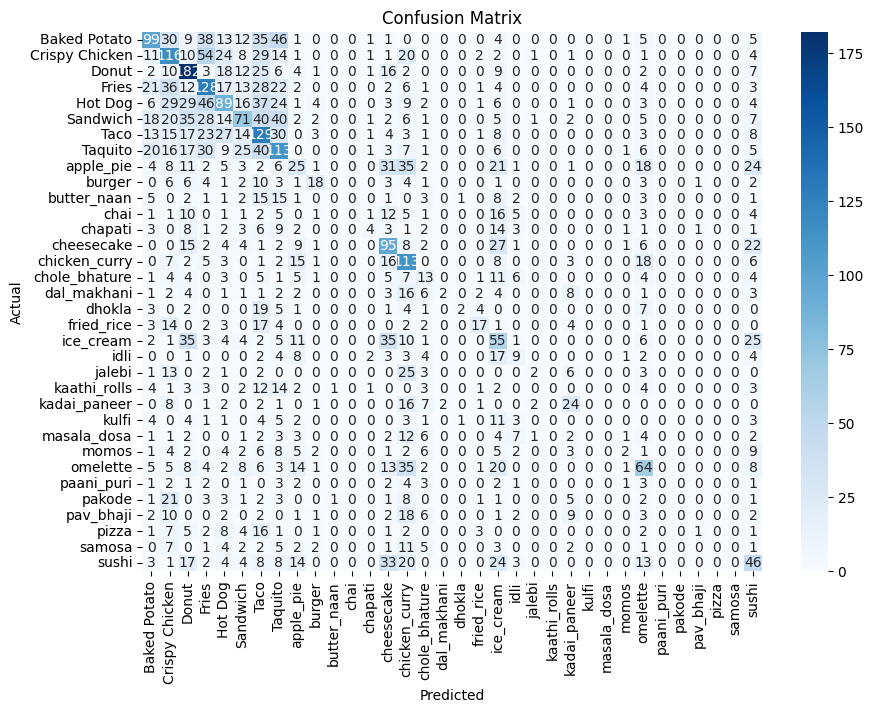

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get true labels and predictions
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(train_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


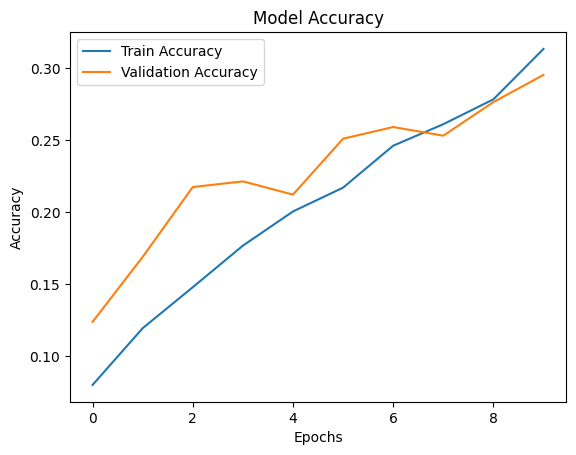

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


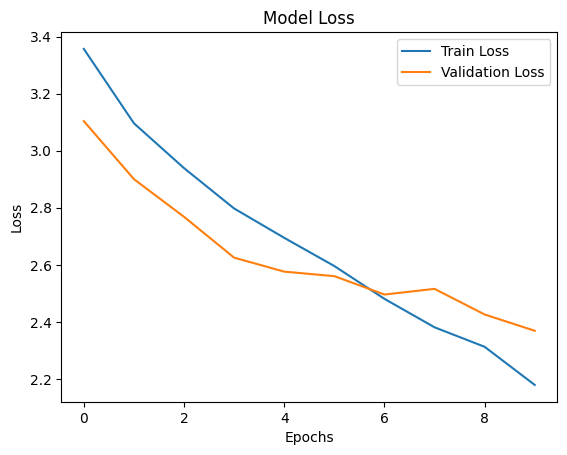

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", report)


Classification Report:
                 precision    recall  f1-score   support

  Baked Potato       0.42      0.33      0.37       300
Crispy Chicken       0.29      0.39      0.33       300
         Donut       0.40      0.61      0.48       300
         Fries       0.33      0.43      0.37       300
       Hot Dog       0.33      0.29      0.31       310
      Sandwich       0.33      0.24      0.28       300
          Taco       0.25      0.43      0.32       300
       Taquito       0.27      0.38      0.32       300
     apple_pie       0.18      0.12      0.15       200
        burger       0.44      0.27      0.34        66
   butter_naan       0.00      0.00      0.00        61
          chai       0.00      0.00      0.00        69
       chapati       0.29      0.06      0.10        65
    cheesecake       0.32      0.47      0.38       200
 chicken_curry       0.27      0.56      0.37       200
 chole_bhature       0.15      0.17      0.16        75
   dal_makhani       0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
